<a href="https://colab.research.google.com/github/Hammadtahir7/Card-Fraud-Detection/blob/master/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#to upload data file from local drive to google colab
#remove this code if using your local machine
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [140]:
# read the original data file from google colab
# ignore this block if running locally
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [112]:
# read the original data file from local system
# use this block if running locally
df=pd.read_csv('creditcard.csv')
df.head()

KeyboardInterrupt: ignored

In [141]:
# get test dataset
import numpy as np
no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices_nonfraud = np.random.choice(non_fraud_indices,10000, replace=False)
fraud_indices = df[df.Class == 1].index
random_indices_fraud = np.random.choice(fraud_indices,17, replace=False)
sample_indices = np.concatenate([random_indices_nonfraud,random_indices_fraud])
test_DS = df.loc[sample_indices]
test_DS.info()

# remaining dataset
remaining_DS=df.drop(sample_indices)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10017 entries, 223724 to 10498
Data columns (total 31 columns):
Time      10017 non-null float64
V1        10017 non-null float64
V2        10017 non-null float64
V3        10017 non-null float64
V4        10017 non-null float64
V5        10017 non-null float64
V6        10017 non-null float64
V7        10017 non-null float64
V8        10017 non-null float64
V9        10017 non-null float64
V10       10017 non-null float64
V11       10017 non-null float64
V12       10017 non-null float64
V13       10017 non-null float64
V14       10017 non-null float64
V15       10017 non-null float64
V16       10017 non-null float64
V17       10017 non-null float64
V18       10017 non-null float64
V19       10017 non-null float64
V20       10017 non-null float64
V21       10017 non-null float64
V22       10017 non-null float64
V23       10017 non-null float64
V24       10017 non-null float64
V25       10017 non-null float64
V26       10017 non-null flo

In [0]:
# get features and labels for remaining dataset
features=remaining_DS.drop(remaining_DS.columns[remaining_DS.shape[1]-1],axis=1)
labels=remaining_DS[remaining_DS.columns[remaining_DS.shape[1]-1]]

#get features and labels for test dataset
X_test=test_DS.drop(test_DS.columns[test_DS.shape[1]-1],axis=1)
y_test=test_DS[test_DS.columns[test_DS.shape[1]-1]]

In [115]:
# ONLY USE THIS BLOCK WHEN UNDER SAMPLING
# IGNORE THIS BLOCK IF USING ORIGINAL RATIO
# COMMENT OUT THE RELEVENT SAMPLER
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss 
#rus = RandomUnderSampler(sampling_strategy=0.1)
#features, labels = rus.fit_resample(features.values, labels.values)
nr = NearMiss(sampling_strategy=1, version=1)
features, labels = nr.fit_resample(features, labels)
features=pd.DataFrame(features)
labels=pd.DataFrame(labels)

print(features.shape)
print(labels.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(950, 30)
(950, 1)


In [143]:
# ONLY USE THIS BLOCK FOR SMOTE SAMPLING
# IGNORE THIS BLOCK IF USING ORIGINAL RATIO
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy=0.1) 
features, labels = sm.fit_resample(features, labels) 
features=pd.DataFrame(features)
labels=pd.DataFrame(labels)

print(features.shape)
print(labels.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(301746, 30)
(301746, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [144]:
# show class frequencies
unique_elements, counts_elements = np.unique(labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))
ratio=counts_elements[1]/counts_elements[0]
print(ratio)
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1]
 [274315  27431]]
0.09999817727794688
Frequency of unique values of the said array:
[[    0     1]
 [10000    17]]


In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# scale features for test sample and remaining samples
scaler = StandardScaler()
features = scaler.fit_transform(features)
X_test = scaler.fit_transform(X_test)

labels=labels.to_numpy()
y_test=y_test.to_numpy()

# split remaining sample dataset into training and validation datasets
X_train, X_val, y_train, y_val=train_test_split(features,labels,test_size=0.2, random_state=42)


print(features[0])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[-1.96369903 -0.29806714 -0.18299928  0.97819613  0.46842123 -0.02000331
  0.41258472  0.26456215  0.02133384  0.41125823  0.25630129 -0.54552232
 -0.01880765 -0.98719458  0.12991985  1.61118367 -0.04977927  0.28651713
  0.17698975  0.37611174  0.26221343 -0.06301401  0.33877146 -0.1531444
  0.12854573  0.22947135 -0.40774023  0.22111614 -0.07983717  0.24454416]
(241396, 30)
(10017, 30)
(241396, 1)
(10017,)


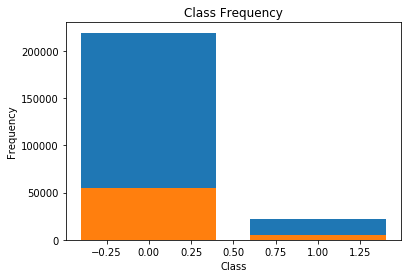

In [146]:
#Plot class frequencies
import matplotlib.pyplot as plt
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_val, return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [147]:
# validation data class frequency
unique_elements, counts_elements = np.unique(y_val, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))

Frequency of unique values of the said array:
[[    0     1]
 [54901  5449]]


In [120]:
#creating forest classifier
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
print(model_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [121]:
#creating SVM classifier
from sklearn import svm
model_svm = svm.SVC(probability=True)
print(model_svm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [122]:
#creating LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1,30)))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                16200     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 16,251
Trainable params: 16,251
Non-trainable params: 0
_________________________________________________________________


In [123]:
#creating 2d CNN
from keras.layers import Conv2D, Flatten

model_2dcnn = Sequential()
model_2dcnn.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(5,6,1)))
model_2dcnn.add(Conv2D(32, kernel_size=3, activation='relu'))
model_2dcnn.add(Flatten())
model_2dcnn.add(Dense(1, activation='sigmoid'))
model_2dcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2dcnn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 3, 4, 64)          640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 2, 32)          18464     
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 19,169
Trainable params: 19,169
Non-trainable params: 0
_________________________________________________________________


In [124]:
# creating simple neural network
model_ann=Sequential()
model_ann.add(Dense(64,input_shape=(30,),activation='relu'))
model_ann.add(Dense(1,activation='sigmoid'))
model_ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_ann.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                1984      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [0]:
#creating 1D CNN
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

model_1dcnn = Sequential()
model_1dcnn.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1,30)))
model_1dcnn.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model_1dcnn.add(Dropout(0.5))
model_1dcnn.add(MaxPooling1D(pool_size=1))
model_1dcnn.add(Flatten())
model_1dcnn.add(Dense(100, activation='relu'))
model_1dcnn.add(Dense(1, activation='sigmoid'))
model_1dcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [126]:
#fit LSTM
model_lstm.fit(X_train.reshape(X_train.shape[0],1,30), y_train, validation_data=(X_test.reshape(X_test.shape[0],1,30), y_test), epochs=10)

Train on 760 samples, validate on 10017 samples
Epoch 1/10
760/760 [==============================] - 2s 3ms/step - loss: 0.6083 - acc: 0.8250 - val_loss: 0.6915 - val_acc: 0.5162
Epoch 2/10
760/760 [==============================] - 0s 625us/step - loss: 0.4847 - acc: 0.8632 - val_loss: 0.7029 - val_acc: 0.4979
Epoch 3/10
760/760 [==============================] - 0s 609us/step - loss: 0.3966 - acc: 0.8724 - val_loss: 0.7276 - val_acc: 0.4526
Epoch 4/10
760/760 [==============================] - 0s 596us/step - loss: 0.3391 - acc: 0.8803 - val_loss: 0.7752 - val_acc: 0.3886
Epoch 5/10
760/760 [==============================] - 0s 616us/step - loss: 0.2996 - acc: 0.8882 - val_loss: 0.8496 - val_acc: 0.3207
Epoch 6/10
760/760 [==============================] - 0s 619us/step - loss: 0.2671 - acc: 0.8961 - val_loss: 0.9411 - val_acc: 0.2769
Epoch 7/10
760/760 [==============================] - 0s 614us/step - loss: 0.2390 - acc: 0.9053 - val_loss: 1.0450 - val_acc: 0.2475
Epoch 8/10
760/7

In [127]:
#fir 2D CNN
model_2dcnn.fit(X_train.reshape(X_train.shape[0],5,6,1), y_train, validation_data=(X_test.reshape(X_test.shape[0],5,6,1), y_test), epochs=10)

Train on 760 samples, validate on 10017 samples
Epoch 1/10
760/760 [==============================] - 2s 3ms/step - loss: 0.4205 - acc: 0.8855 - val_loss: 1.2387 - val_acc: 0.1811
Epoch 2/10
760/760 [==============================] - 1s 708us/step - loss: 0.2163 - acc: 0.9276 - val_loss: 2.3121 - val_acc: 0.0660
Epoch 3/10
760/760 [==============================] - 1s 748us/step - loss: 0.1681 - acc: 0.9395 - val_loss: 2.7859 - val_acc: 0.0817
Epoch 4/10
760/760 [==============================] - 1s 735us/step - loss: 0.1445 - acc: 0.9421 - val_loss: 3.3199 - val_acc: 0.0685
Epoch 5/10
760/760 [==============================] - 1s 762us/step - loss: 0.1321 - acc: 0.9461 - val_loss: 3.3648 - val_acc: 0.0895
Epoch 6/10
760/760 [==============================] - 1s 768us/step - loss: 0.1220 - acc: 0.9526 - val_loss: 3.7683 - val_acc: 0.0716
Epoch 7/10
760/760 [==============================] - 1s 756us/step - loss: 0.1186 - acc: 0.9513 - val_loss: 3.3693 - val_acc: 0.1450
Epoch 8/10
760/7

In [128]:
#fit simple neural network
model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 760 samples, validate on 10017 samples
Epoch 1/10
760/760 [==============================] - 2s 2ms/step - loss: 0.6167 - acc: 0.6908 - val_loss: 0.7443 - val_acc: 0.4803
Epoch 2/10
760/760 [==============================] - 0s 421us/step - loss: 0.3773 - acc: 0.8697 - val_loss: 0.8291 - val_acc: 0.3729
Epoch 3/10
760/760 [==============================] - 0s 430us/step - loss: 0.3110 - acc: 0.8882 - val_loss: 0.9347 - val_acc: 0.2864
Epoch 4/10
760/760 [==============================] - 0s 433us/step - loss: 0.2710 - acc: 0.9039 - val_loss: 1.0631 - val_acc: 0.2135
Epoch 5/10
760/760 [==============================] - 0s 450us/step - loss: 0.2420 - acc: 0.9145 - val_loss: 1.1703 - val_acc: 0.1842
Epoch 6/10
760/760 [==============================] - 0s 431us/step - loss: 0.2188 - acc: 0.9263 - val_loss: 1.2890 - val_acc: 0.1602
Epoch 7/10
760/760 [==============================] - 0s 426us/step - loss: 0.2003 - acc: 0.9368 - val_loss: 1.3952 - val_acc: 0.1524
Epoch 8/10
760/7

In [129]:
#fit SVM
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [130]:
#fit RF
model_rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
# fit 1D CNN
model_1dcnn.fit(X_train.reshape(X_train.shape[0],1,30), y_train, validation_data=(X_test.reshape(X_test.shape[0],1,30), y_test), epochs=10)

Train on 760 samples, validate on 10017 samples
Epoch 1/10
760/760 [==============================] - 2s 3ms/step - loss: 0.5725 - acc: 0.7434 - val_loss: 1.0574 - val_acc: 0.0606
Epoch 2/10
760/760 [==============================] - 0s 532us/step - loss: 0.3065 - acc: 0.9079 - val_loss: 1.9620 - val_acc: 0.0379
Epoch 3/10
760/760 [==============================] - 0s 517us/step - loss: 0.2192 - acc: 0.9276 - val_loss: 2.9186 - val_acc: 0.0336
Epoch 4/10
760/760 [==============================] - 0s 519us/step - loss: 0.1725 - acc: 0.9382 - val_loss: 3.7781 - val_acc: 0.0310
Epoch 5/10
760/760 [==============================] - 0s 523us/step - loss: 0.1597 - acc: 0.9447 - val_loss: 3.8252 - val_acc: 0.0543
Epoch 6/10
760/760 [==============================] - 0s 549us/step - loss: 0.1458 - acc: 0.9500 - val_loss: 4.1216 - val_acc: 0.0596
Epoch 7/10
760/760 [==============================] - 0s 500us/step - loss: 0.1321 - acc: 0.9592 - val_loss: 4.6154 - val_acc: 0.0542
Epoch 8/10
760/7

In [132]:
# performance on validation dataset
from sklearn import metrics
X=X_val
y=y_val
y_pred=model_lstm.predict_classes(X.reshape(X.shape[0],1,30))
y_pred=np.append(y_pred,model_2dcnn.predict_classes(X.reshape(X.shape[0],5,6,1)),axis=1)
y_pred=np.append(y_pred,model_ann.predict_classes(X),axis=1)
y_pred=np.append(y_pred,model_rf.predict(X).reshape(X.shape[0],1),axis=1)
y_pred=np.append(y_pred,model_1dcnn.predict_classes(X.reshape(X.shape[0],1,30)),axis=1)
y_pred=np.append(y_pred,model_svm.predict(X).reshape(X.shape[0],1),axis=1)
print(y_pred.shape)

header=['LSTM','2DCNN','ANN','RF','1DCNN','SVM']

for x in range (len(y_pred[0])):
  print(header[x])
  print("Accuracy: "+"{:.2%}".format(metrics.accuracy_score(y, y_pred[:,x])))
  print("Precision: "+"{:.2%}".format(metrics.precision_score(y, y_pred[:,x])))
  print("Recall: "+"{:.2%}".format(metrics.recall_score(y, y_pred[:,x])))
  print("F1: "+"{:.2%}".format(metrics.f1_score(y,y_pred[:,x])))
  print(metrics.confusion_matrix(y,y_pred[:,x]))
  print("-----------")

(190, 6)
LSTM
Accuracy: 94.21%
Precision: 96.77%
Recall: 91.84%
F1: 94.24%
[[89  3]
 [ 8 90]]
-----------
2DCNN
Accuracy: 92.63%
Precision: 91.18%
Recall: 94.90%
F1: 93.00%
[[83  9]
 [ 5 93]]
-----------
ANN
Accuracy: 94.21%
Precision: 97.80%
Recall: 90.82%
F1: 94.18%
[[90  2]
 [ 9 89]]
-----------
RF
Accuracy: 96.32%
Precision: 96.91%
Recall: 95.92%
F1: 96.41%
[[89  3]
 [ 4 94]]
-----------
1DCNN
Accuracy: 93.68%
Precision: 92.16%
Recall: 95.92%
F1: 94.00%
[[84  8]
 [ 4 94]]
-----------
SVM
Accuracy: 94.74%
Precision: 97.83%
Recall: 91.84%
F1: 94.74%
[[90  2]
 [ 8 90]]
-----------


In [134]:
# use this block to upload score file from local computer
uploaded2 = files.upload()

Saving score123.csv to score123 (2).csv


In [135]:
# use this block to read uploaded file for google colaboratory
df1 = pd.read_csv(io.BytesIO(uploaded2['score123.csv']),names=["Classifier", "Ratio", "Accuracy", "Precision", "Recall","F1"])
score=df1.to_numpy()
print(score)

[['LSTM' 1.0 19.55 0.21 100.0 0.42]
 ['2DCNN' 1.0 14.77 0.2 100.0 0.4]
 ['ANN' 1.0 12.9 0.19 100.0 0.39]
 ['RF' 1.0 1.7 0.17 100.0 0.34]
 ['1DCNN' 1.0 5.97 0.18 100.0 0.36]
 ['SVM' 1.0 1.12 0.17 100.0 0.34]]


In [0]:
#use this block to read score file locally
#create an empty score.csv file to save classifier results
df1 = pd.read_csv('score.csv',names=["Classifier", "Ratio", "Accuracy", "Precision", "Recall","F1"])
score=df1.to_numpy()
print(score)

In [136]:
X=X_test
y=y_test
y_pred=model_lstm.predict_classes(X.reshape(X.shape[0],1,30))
y_pred=np.append(y_pred,model_2dcnn.predict_classes(X.reshape(X.shape[0],5,6,1)),axis=1)
y_pred=np.append(y_pred,model_ann.predict_classes(X),axis=1)
y_pred=np.append(y_pred,model_rf.predict(X).reshape(X.shape[0],1),axis=1)
y_pred=np.append(y_pred,model_1dcnn.predict_classes(X.reshape(X.shape[0],1,30)),axis=1)
y_pred=np.append(y_pred,model_svm.predict(X).reshape(X.shape[0],1),axis=1)
print(y_pred.shape)

header=['LSTM','2DCNN','ANN','RF','1DCNN','SVM']

for x in range (len(y_pred[0])):
  score_row=header[x]
  print(header[x])
  score_row=np.append(score_row,np.round(ratio,2))
  print(ratio)
  score_row=np.append(score_row, np.round(metrics.accuracy_score(y, y_pred[:,x])*100,2))
  print("Accuracy: "+"{:.2%}".format(metrics.accuracy_score(y, y_pred[:,x])))
  score_row=np.append(score_row, np.round(metrics.precision_score(y, y_pred[:,x])*100,2))
  print("Precision: "+"{:.2%}".format(metrics.precision_score(y, y_pred[:,x])))
  score_row=np.append(score_row, np.round(metrics.recall_score(y, y_pred[:,x])*100,2))
  print("Recall: "+"{:.2%}".format(metrics.recall_score(y, y_pred[:,x])))
  score_row=np.append(score_row, np.round(metrics.f1_score(y,y_pred[:,x])*100,2))
  print("F1: "+"{:.2%}".format(metrics.f1_score(y,y_pred[:,x])))
  print(metrics.confusion_matrix(y,y_pred[:,x]))
  print(score_row)
  print(score_row.shape)
  print("-----------")
  score=np.vstack((score,score_row))

(10017, 6)
LSTM
1.0
Accuracy: 19.29%
Precision: 0.21%
Recall: 100.00%
F1: 0.42%
[[1915 8085]
 [   0   17]]
['LSTM' '1.0' '19.29' '0.21' '100.0' '0.42']
(6,)
-----------
2DCNN
1.0
Accuracy: 8.33%
Precision: 0.18%
Recall: 100.00%
F1: 0.37%
[[ 817 9183]
 [   0   17]]
['2DCNN' '1.0' '8.33' '0.18' '100.0' '0.37']
(6,)
-----------
ANN
1.0
Accuracy: 13.47%
Precision: 0.20%
Recall: 100.00%
F1: 0.39%
[[1332 8668]
 [   0   17]]
['ANN' '1.0' '13.47' '0.2' '100.0' '0.39']
(6,)
-----------
RF
1.0
Accuracy: 2.80%
Precision: 0.17%
Recall: 100.00%
F1: 0.35%
[[ 263 9737]
 [   0   17]]
['RF' '1.0' '2.8' '0.17' '100.0' '0.35']
(6,)
-----------
1DCNN
1.0
Accuracy: 6.65%
Precision: 0.18%
Recall: 100.00%
F1: 0.36%
[[ 649 9351]
 [   0   17]]
['1DCNN' '1.0' '6.65' '0.18' '100.0' '0.36']
(6,)
-----------
SVM
1.0
Accuracy: 2.82%
Precision: 0.17%
Recall: 100.00%
F1: 0.35%
[[ 265 9735]
 [   0   17]]
['SVM' '1.0' '2.82' '0.17' '100.0' '0.35']
(6,)
-----------


In [137]:
print(score)

[['LSTM' 1.0 19.55 0.21 100.0 0.42]
 ['2DCNN' 1.0 14.77 0.2 100.0 0.4]
 ['ANN' 1.0 12.9 0.19 100.0 0.39]
 ['RF' 1.0 1.7 0.17 100.0 0.34]
 ['1DCNN' 1.0 5.97 0.18 100.0 0.36]
 ['SVM' 1.0 1.12 0.17 100.0 0.34]
 ['LSTM' '1.0' '19.29' '0.21' '100.0' '0.42']
 ['2DCNN' '1.0' '8.33' '0.18' '100.0' '0.37']
 ['ANN' '1.0' '13.47' '0.2' '100.0' '0.39']
 ['RF' '1.0' '2.8' '0.17' '100.0' '0.35']
 ['1DCNN' '1.0' '6.65' '0.18' '100.0' '0.36']
 ['SVM' '1.0' '2.82' '0.17' '100.0' '0.35']]


In [0]:
pd.DataFrame(score).to_csv("score123.csv",header=None, index=None)
files.download("score123.csv")

In [0]:
#write results onto the score.csv file
#use this block if running locally
pd.DataFrame(score).to_csv("score.csv",header=None, index=None)

In [150]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [151]:
import keras
print(keras.__version__)

2.2.5


In [152]:
import sys
sys.version

'3.6.9 (default, Nov  7 2019, 10:44:02) \n[GCC 8.3.0]'